In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [3]:
dogs = pd.read_csv('../datasets/dogs.csv')

In [4]:
dogs

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


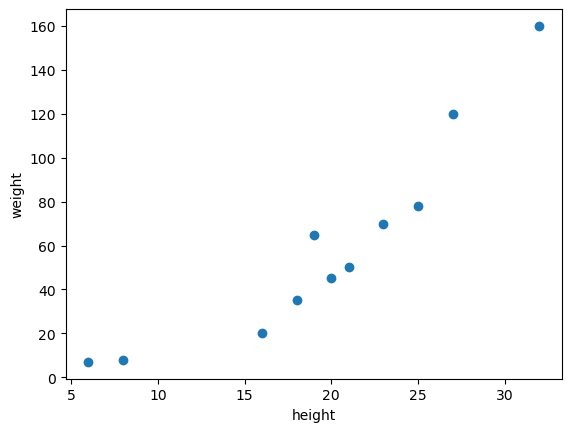

In [5]:
plt.scatter(dogs['height'], dogs['weight'])
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [6]:
featrue_names = dogs.columns[1:]

In [7]:
featrue_names

Index(['height', 'weight'], dtype='object')

In [8]:
X = dogs[featrue_names]

In [9]:
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X)

MinMaxScaler()

In [13]:
X = scaler.transform(X)

In [14]:
X

array([[0.53846154, 0.24836601],
       [0.38461538, 0.08496732],
       [0.46153846, 0.18300654],
       [0.80769231, 0.73856209],
       [0.07692308, 0.00653595],
       [0.73076923, 0.46405229],
       [0.65384615, 0.41176471],
       [1.        , 1.        ],
       [0.57692308, 0.28104575],
       [0.5       , 0.37908497],
       [0.        , 0.        ]])

In [15]:
X = pd.DataFrame(X, columns=featrue_names)

In [16]:
kmeans = KMeans(n_clusters=2)

In [17]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [18]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [19]:
X[kmeans.labels_ == 0]

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
4,0.076923,0.006536
8,0.576923,0.281046
9,0.500000,0.379085
10,0.000000,0.000000


In [20]:
X[kmeans.labels_ == 1]

,height,weight
3,0.807692,0.738562
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000


In [21]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=featrue_names)

In [22]:
centers

,height,weight
0,0.362637,0.169001
1,0.798077,0.653595


In [23]:
kmeans.inertia_ # SSE

0.7321285100264339

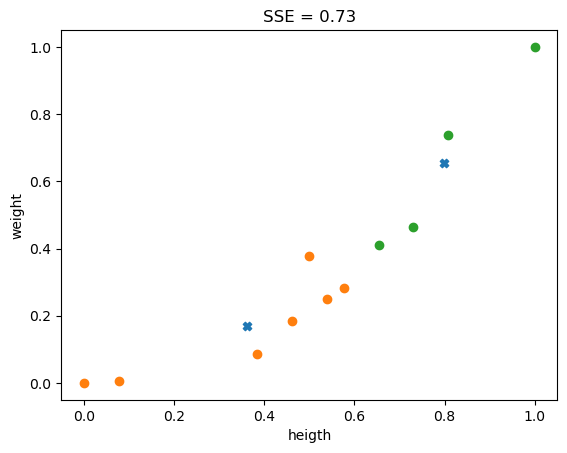

In [24]:
plt.scatter(centers['height'], centers['weight'], marker='X', label='centroids')

for c in np.unique(kmeans.labels_):
    elems = X[kmeans.labels_ == c]
    plt.scatter(elems['height'], elems['weight'], label=c)
    
plt.xlabel('heigth')
plt.ylabel('weight')
plt.title(f'SSE = {np.round(kmeans.inertia_, 2)}')
plt.show()

In [25]:
dogs[kmeans.labels_ == 1]

,breed,height,weight
3,Bullmastiff,27,120
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160


In [26]:
dogs[kmeans.labels_ == 0]

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
4,Chihuahua,8,8
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65
10,Yorkshire Terrier,6,7


In [27]:
from sklearn.metrics import silhouette_samples

In [28]:
silhouette_values = silhouette_samples(X, kmeans.labels_)

In [29]:
silhouette_values

array([0.43838016, 0.60941263, 0.57018981, 0.55642193, 0.57654584,
       0.31689847, 0.02088641, 0.49092545, 0.30420853, 0.21612362,
       0.54509422])

In [30]:
from sklearn.metrics import silhouette_score

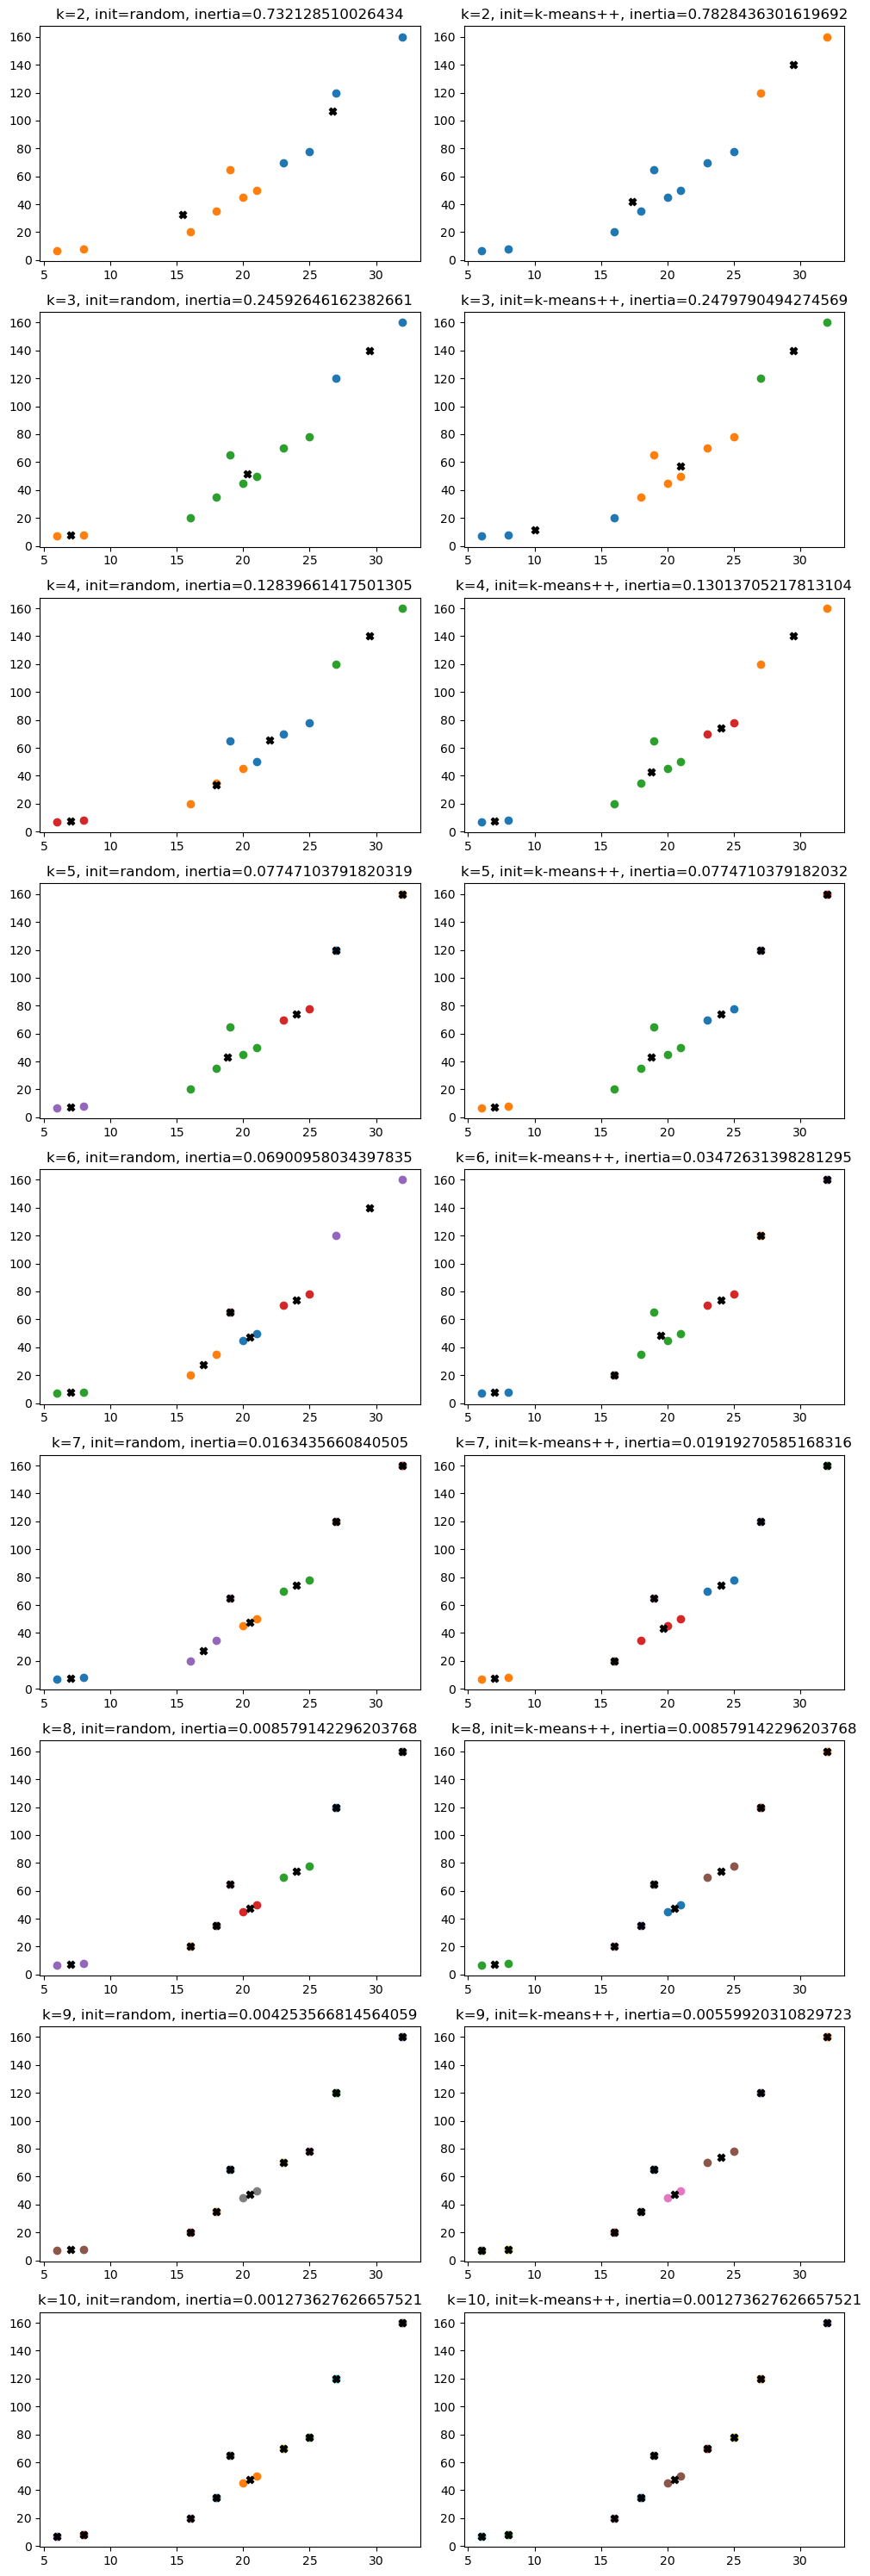

In [31]:
ks = range(2, X.shape[0])
inits = ['random', 'k-means++']
fig = plt.figure(figsize=(10,30))
idx = 1
silhouette = []
inertias = []

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init)
        kmeans.fit(X)
        if init == 'k-means++':
            inertias.append(kmeans.inertia_)
            silhouette.append(silhouette_score(X, kmeans.labels_))
        fig.add_subplot(len(ks), len(inits), idx)
        idx += 1
        for label in range(k):
            cluster = dogs[kmeans.labels_ == label]
            plt.scatter(cluster['height'], cluster['weight'])
        centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=featrue_names)
        plt.scatter(centroids['height'], centroids['weight'], color='black', marker='X')
        plt.title(f'k={k}, init={init}, inertia={kmeans.inertia_}')
        
plt.tight_layout()

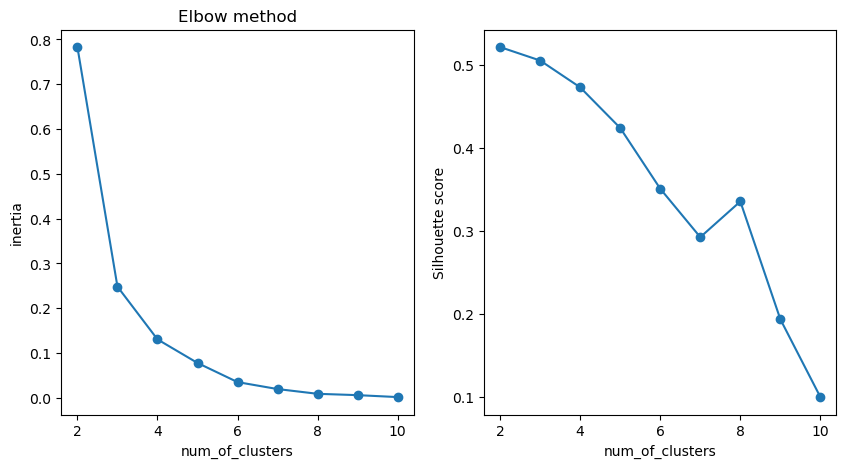

In [32]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(ks, inertias, marker='o')
plt.ylabel('inertia')
plt.xlabel('num_of_clusters')
plt.title('Elbow method')

plt.subplot(1,2,2)
plt.plot(ks, silhouette, marker='o')
plt.xlabel('num_of_clusters')
plt.ylabel('Silhouette score')
plt.show()

In [33]:
## KOMPRESIJA SLIKE

In [34]:
from matplotlib.image import imread

In [35]:
import seaborn as sns

In [36]:
img = imread('../datasets/masa.jpg')

In [37]:
img_size = img.shape

In [38]:
img_size

(396, 396, 3)

In [39]:
X_img = img.reshape(img_size[0]*img_size[1], img_size[2])

In [40]:
km = KMeans(n_clusters=30)

In [41]:
km.fit(X_img)

KMeans(n_clusters=30)

In [42]:
X_comp = km.cluster_centers_[km.labels_]
X_comp = np.clip(X_comp.astype('uint8'), 0, 255)

In [43]:
X_comp = X_comp.reshape(img_size[0], img_size[1], img_size[2])

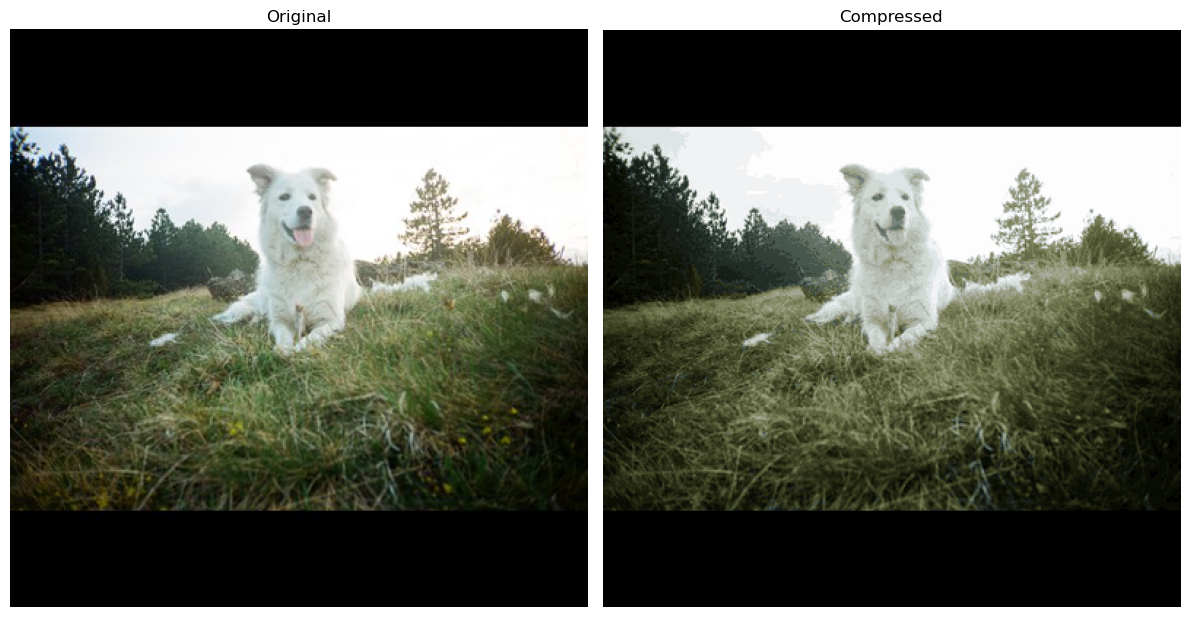

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(X_comp)
ax[1].set_title('Compressed')

for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

In [45]:
from sklearn.cluster import BisectingKMeans

In [51]:
bkmeans = BisectingKMeans(n_clusters=3, bisecting_strategy='largest_cluster')

In [49]:
def visualize(data, centers, labels, feature_names, alg_name):
    plt.scatter(centers[:,0], centers[:,1], marker='X', label='centroids', color='black')
    for c in np.unique(labels):
        elems = data[labels == c]
        plt.scatter(elems[featrue_names[0]], elems[featrue_names[1]], label=c)
        
    plt.xlabel(featrue_names[0])
    plt.ylabel(featrue_names[1])
    plt.title(f'{alg_name} {len(centers)}')
    plt.legend()

In [52]:
bkmeans.fit(X)

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=3)

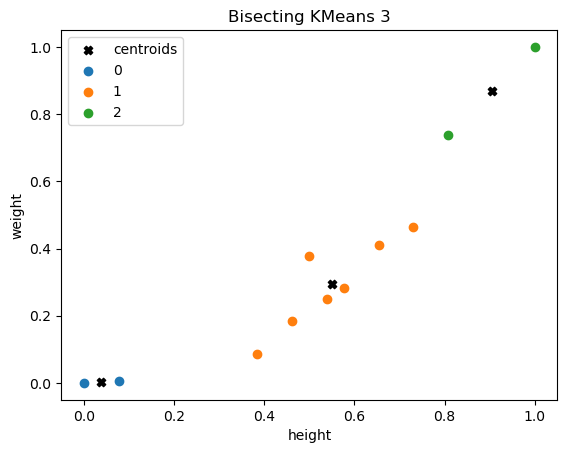

In [53]:
visualize(X, bkmeans.cluster_centers_, bkmeans.labels_, X.columns, 'Bisecting KMeans')

In [56]:
!pip install scikit-fuzzy

In [57]:
from fcmeans import FCM

ModuleNotFoundError: No module named 'fcmeans'